In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Mariam\Downloads\Salary_dataset.csv")
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


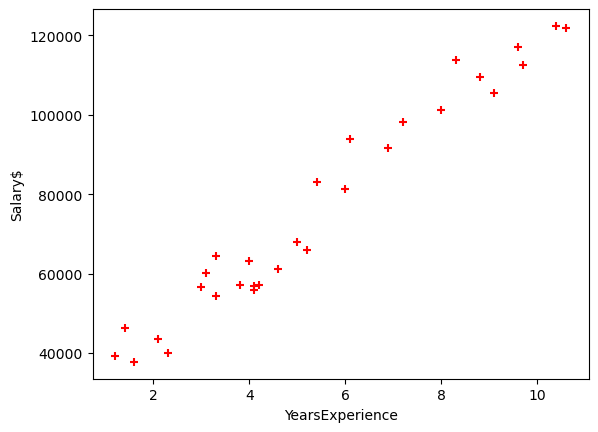

In [3]:

plt.scatter(df["YearsExperience"],df.Salary, color="red" , marker="+")
plt.xlabel("YearsExperience")
plt.ylabel("Salary$")
plt.show()

Coefficients:
Slope (m): 9449.962321455077
Intercept (b): 24848.203966523193


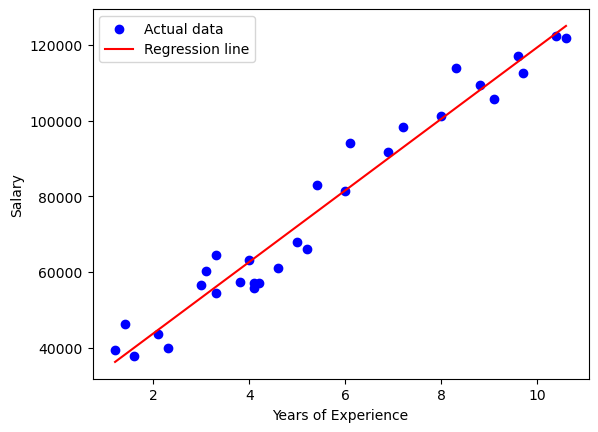

Predicted Y value: 176047.60110980444


In [5]:

X = df['YearsExperience'].values
Y = df['Salary'].values


mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)


numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2

m = numerator / denominator
b = mean_y - (m * mean_x)


print("Slope (m):", m)
print("Intercept (b):", b)


Y_pred = m * X + b


plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

new_X = 16.0  
Y_pred = m * new_X + b

print("Predicted Y value:", Y_pred)




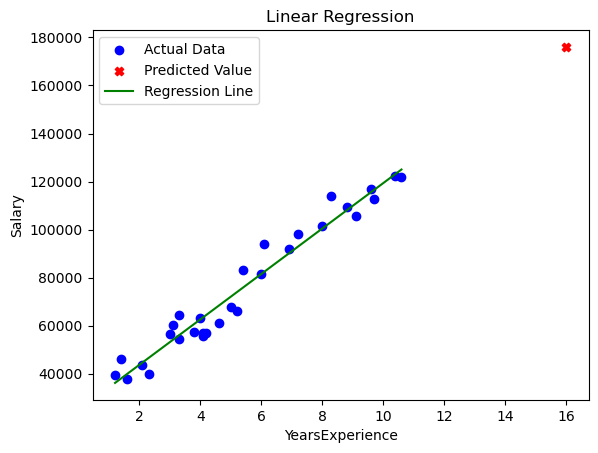

In [6]:

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.scatter(new_X, Y_pred, color='red', label='Predicted Value', marker='X')
plt.plot(X, m * X + b, color='green', label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\Mariam\Downloads\Salary_dataset.csv")

reg = LinearRegression()

# Use double square brackets to pass a 2D array
reg.fit(df[["YearsExperience"]], df.Salary)

# Provide a 2D array as input for prediction
prediction = reg.predict([[16.0]])

print("Prediction:", prediction)

coefficients = reg.coef_
intercept = reg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Prediction: [176047.6011098]
Coefficients: [9449.96232146]
Intercept: 24848.203966523193


C:\Users\Mariam\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import numpy as np
data = pd.read_csv("C:/Users/Mariam/Downloads/data_for_lr.csv")

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)


In [12]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss


In [13]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Iteration = 1, Loss = 11509.403769913115
Iteration = 2, Loss = 5226.150108831298
Iteration = 3, Loss = 2375.4309607687333
Iteration = 4, Loss = 1082.0565232798199
Iteration = 5, Loss = 495.25110595748157
Iteration = 6, Loss = 229.01683570980862
Iteration = 7, Loss = 108.22604996784865
Iteration = 8, Loss = 53.42313424545125
Iteration = 9, Loss = 28.55898824193667
Iteration = 10, Loss = 17.27809522141733
Iteration = 11, Loss = 12.15993912477654
Iteration = 12, Loss = 9.837823596723695
Iteration = 13, Loss = 8.784274771771761
Iteration = 14, Loss = 8.30627606525628
Iteration = 15, Loss = 8.08940508510124
Iteration = 16, Loss = 7.991008043754554
Iteration = 17, Loss = 7.94636275979462
Iteration = 18, Loss = 7.926104707821489
Iteration = 19, Loss = 7.916911170135841
Iteration = 20, Loss = 7.912737614960706


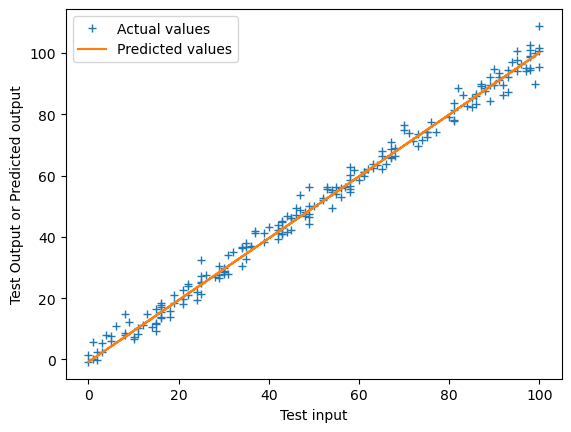

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()
